In [202]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import os
from scipy import stats
import plotly.express as px
import plotly
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
RAW_DATA_PATH = "~/library/data/raw/"
PROC_DATA_PATH = '~/library/data/processed/'

In [203]:
plotly.offline.init_notebook_mode(connected=True)

In [173]:
df_1 = pd.read_csv(RAW_DATA_PATH + 'business-survival-rates.csv', sep=',', na_values=[':']) 
df_2 = pd.read_csv(RAW_DATA_PATH + 'Jobs and Job Density.csv', sep=',') 
df_3 = pd.read_csv(RAW_DATA_PATH + 'mb-unemployment-rates.csv', sep=',', na_values=[' ', '-'])

In [174]:
df_1.drop(['births','1_year_survival_number', '1_year_survival_rate', '2_year_survival_number', '2_year_survival_rate', '4_year_survival_number', '4_year_survival_rate' ,'5_year_survival_number', '5_year_survival_rate'], inplace=True, axis=1)

In [175]:
df_1

,code,area,year,3_year_survival_number,3_year_survival_rate
0,E09000001,City of London,2002,760.0,66.4
1,E09000002,Barking and Dagenham,2002,250.0,57.5
2,E09000003,Barnet,2002,1290.0,55.4
3,E09000004,Bexley,2002,470.0,61.4
4,E09000005,Brent,2002,810.0,49.5
5,E09000006,Bromley,2002,825.0,64.5
6,E09000007,Camden,2002,1485.0,57.6
7,E09000008,Croydon,2002,805.0,57.7
8,E09000009,Ealing,2002,1020.0,57.5
9,E09000010,Enfield,2002,685.0,58.5


In [176]:
def replaceCol(df):
    col_length = len(df.columns)
    mapping = {df.columns[0]:'code', df.columns[1]:'area'}
    for index in range(2, col_length):
        if index%2!=0:
            mapping[df.columns[index]] = '+/- Difference'
    return mapping

df_1.dropna(inplace=True, axis=0, how='any')
df_3.dropna(inplace=True, axis=0, how='any')
mapping = replaceCol(df_3)
df_3.rename(columns=mapping, inplace=True)
df_3 = df_3.reset_index(drop=True)
df = pd.merge(df_1, df_2, on=['code','area', 'year'])

In [177]:
def colToDrop(df):
    col_length = len(df.columns)
    arr = []
    for index in range(2, col_length):
        if df.columns[index].find('Jan') != -1:
            if index + 2 < col_length:
                index += 2
            pass
        arr.append(df.columns[index])    
    return arr

df_3.drop(columns=colToDrop(df_3), inplace=True, axis=1)

In [178]:
df_3 = df_3.melt(id_vars=["code", "area"], 
        var_name="Date", 
        value_name="Value")

In [179]:
df_3['Date'] = df_3['Date'].apply(lambda x: [int(s) for s in str.split(x) if s.isdigit()][0])

In [180]:
df_3.rename(columns={'Date':'year', 'Value':'unemployment_rate'}, inplace=True)

In [181]:
df = pd.merge(df, df_3, on=['code','area', 'year'])

In [182]:
df['unemployment_rate'] = df['unemployment_rate'].astype('float')

In [183]:
to_drop=['North East', 'North West', 'East Midlands', 'West Midlands',
       'East', 'London', 'South East', 'South West', 'England', 'Wales',
       'Scotland', 'Great Britain']
df = df[~df['area'].isin(to_drop)]

In [184]:
df

,code,area,year,3_year_survival_number,3_year_survival_rate,number_of_jobs,job_density,unemployment_rate
0,E09000002,Barking and Dagenham,2004,290.0,60.4,53000,0.51,8.3
1,E09000003,Barnet,2004,1385.0,56.9,135000,0.63,6.3
2,E09000004,Bexley,2004,565.0,60.1,85000,0.61,4.1
3,E09000005,Brent,2004,995.0,55.3,119000,0.65,9.1
4,E09000006,Bromley,2004,1015.0,63.8,126000,0.67,4.7
5,E09000007,Camden,2004,1810.0,63.7,278000,1.82,7.6
6,E09000008,Croydon,2004,1000.0,61.3,153000,0.69,6.2
7,E09000009,Ealing,2004,1210.0,57.2,136000,0.63,6.5
8,E09000010,Enfield,2004,855.0,61.1,110000,0.59,6.6
9,E09000011,Greenwich,2004,590.0,60.5,77000,0.50,8.0


In [19]:
boroughs = df['area'].unique().tolist()

shap_arr = []
k2_arr = []
index = 0
for borough in boroughs:
    plt.figure(index)
    index += 1
    stat, p = stats.shapiro(df[df['area'] == borough]['unemployment_rate'])
    #print(len(df[df['area'] == borough]['unemployment_rate']))
    #print()
    plt.scatter()
    #print('Borough=%s, Statistics=%.3f, p=%.3f' % (borough, stat, p))
    # interpret
    alpha = 0.05
    if p <= alpha:
        shap_arr.append((borough, stat, p))
        #print(df[df['area'] == borough]['unemployment_rate'])
        #plt.hist(df[df['area'] == borough]['unemployment_rate'], bins=25)

        print("Shapiro-Wilk's Test not passed (reject H0)", end='\n')
        
    stat, p = stats.normaltest(df[df['area'] == borough]['unemployment_rate'])
    # print('Statistics=%.3f, p=%.3f' % (borough, stat, p))
    # interpret
    #alpha = 0.05
    if p <= alpha:
        k2_arr.append((borough, stat, p))
        print('D’Agostino’s K^2 Test not passed (reject H0)', end='\n')

if len(shap_arr)!= 0:
    print(shap_arr, end='\n')
print()
if len(k2_arr)!= 0:
    print(k2_arr, end='\n')

14

14

14

14

14

14

14

14

14

14

14

Shapiro-Wilk's Test not passed (reject H0)
14

14

14

14

14

14

14

14

14

14

Shapiro-Wilk's Test not passed (reject H0)
14

14

14

14

14

D’Agostino’s K^2 Test not passed (reject H0)
14

14

14

Shapiro-Wilk's Test not passed (reject H0)
14

14

14

14

14

Shapiro-Wilk's Test not passed (reject H0)
D’Agostino’s K^2 Test not passed (reject H0)
14

Shapiro-Wilk's Test not passed (reject H0)
14

Shapiro-Wilk's Test not passed (reject H0)
14

Shapiro-Wilk's Test not passed (reject H0)
14

14

14

Shapiro-Wilk's Test not passed (reject H0)
D’Agostino’s K^2 Test not passed (reject H0)
14

Shapiro-Wilk's Test not passed (reject H0)
D’Agostino’s K^2 Test not passed (reject H0)
14

Shapiro-Wilk's Test not passed (reject H0)
D’Agostino’s K^2 Test not passed (reject H0)
14

14

Shapiro-Wilk's Test not passed (reject H0)
D’Agostino’s K^2 Test not passed (reject H0)
[('Hackney', 0.8298305869102478, 0.011958095245063305), ('Lambeth', 0.86772990226

In [ ]:
df.to_csv(PROC_DATA_PATH + 'borough-unemployment-and-business-data.csv')

In [162]:
df['unemployment_rate'].describe()

count    352.000000
mean       8.026705
std        2.247575
min        3.500000
25%        6.400000
50%        7.800000
75%        9.425000
max       14.200000
Name: unemployment_rate, dtype: float64

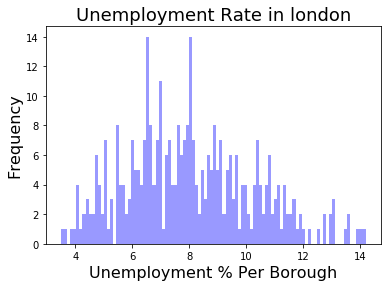

In [185]:
hplot = sns.distplot(df['unemployment_rate'], kde=False, color='blue', bins=100)
plt.title('Unemployment Rate in london', fontsize=18)
plt.xlabel('Unemployment % Per Borough', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plot_file_name="Unemployment_rate_in_london_by_borough.jpg"
hplot.figure.savefig(plot_file_name,
                    format='jpeg',
                    dpi=100)

Text(0.5, 0, 'Unemployment')

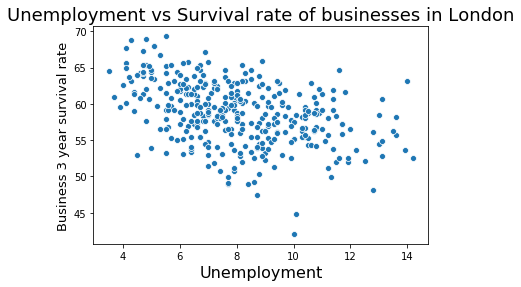

In [186]:
sns.scatterplot('unemployment_rate','3_year_survival_rate',data=df)
plt.title('Unemployment vs Survival rate of businesses in London', fontsize=18)
plt.ylabel('Business 3 year survival rate', fontsize=13)
plt.xlabel('Unemployment', fontsize=16)

Text(0.5, 0, 'Unemployment')

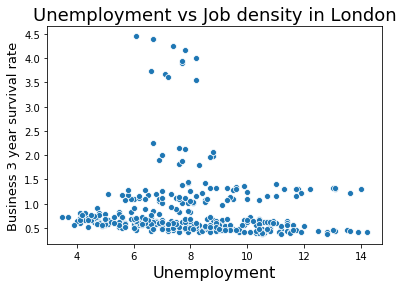

In [187]:
sns.scatterplot('unemployment_rate','job_density',data=df)
plt.title('Unemployment vs Job density in London', fontsize=18)
plt.ylabel('Business 3 year survival rate', fontsize=13)
plt.xlabel('Unemployment', fontsize=16)

In [188]:
df["unemployment_rate_r"] = df['unemployment_rate'].rank()
df["3_year_survival_rate_r"] = df['3_year_survival_rate'].rank()
df['job_density_r'] = df['job_density'].rank()

In [189]:
np.corrcoef(df['unemployment_rate_r'], df['job_density_r'])

array([[ 1.        , -0.24094071],
       [-0.24094071,  1.        ]])

In [190]:
np.corrcoef(df['unemployment_rate_r'], df['3_year_survival_rate_r'])

array([[ 1.        , -0.43170871],
       [-0.43170871,  1.        ]])

In [191]:
stats.spearmanr(df['unemployment_rate_r'],df['3_year_survival_rate_r'])

SpearmanrResult(correlation=-0.43170870605076617, pvalue=2.0590525965516225e-17)

Text(0.5, 0, 'Job Density')

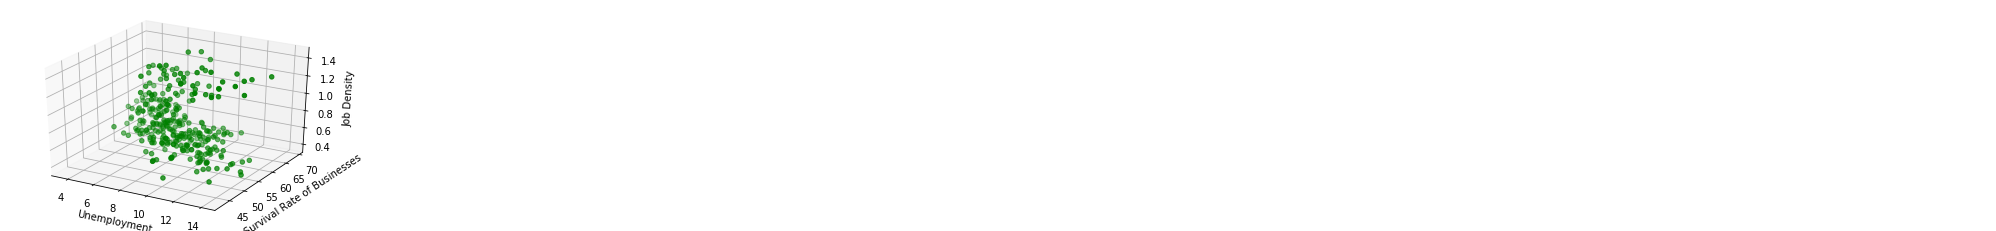

In [197]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

s = [u'+', u'+', u'o']
col = ['b','r','g']

ax.scatter(df['unemployment_rate'], df['3_year_survival_rate'],df['job_density'], marker=_s, c=c)
#plt.savefig('3d_plot.png', format='jpeg', dpi=500)
ax.set_xlabel('Unemployment')
ax.set_ylabel('3 Year Survival Rate of Businesses')
ax.set_zlabel('Job Density')

In [193]:
import matplotlib.rcsetup as rcsetup
print(rcsetup.all_backends)

['GTK3Agg', 'GTK3Cairo', 'MacOSX', 'nbAgg', 'Qt4Agg', 'Qt4Cairo', 'Qt5Agg', 'Qt5Cairo', 'TkAgg', 'TkCairo', 'WebAgg', 'WX', 'WXAgg', 'WXCairo', 'agg', 'cairo', 'pdf', 'pgf', 'ps', 'svg', 'template']


In [194]:
import matplotlib
matplotlib.matplotlib_fname()

'/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc'

In [204]:
fig = px.scatter_3d(df, x='job_density',y='3_year_survival_rate',z='unemployment_rate',
              color='unemployment_rate', size_max=18, opacity=0.7)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

In [199]:
to_drop = ['Camden', 'Westminster']

df = df[~df['area'].isin(to_drop)]
fig = px.scatter_matrix(df, dimensions=['unemployment_rate','3_year_survival_rate','job_density',], color="area")
fig.show()